In [15]:
# This code was adapted from course material by Jenna Wiens (UMichigan).

import sys

In [16]:
# To add your own Drive Run this cell.
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [17]:
# Please specify the full paths to the regression_train.csv
# and regression_test.csv files in your gdrive directory
### ========== TODO : START ========== ###
train_path = '/content/gdrive/My Drive/CSM146/HW2/regression_train.csv'
test_path = '/content/gdrive/My Drive/CSM146/HW2/regression_test.csv'
### ========== TODO : END ========== ###

In [18]:
# Use only the provided packages!
import os
import numpy as np
import matplotlib.pyplot as plt

In [19]:
######################################################################
# classes
######################################################################

class Data :
    
    def __init__(self, X=None, y=None) :
        """
        Data class.
        
        Attributes
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        """
        
        # n = number of examples, d = dimensionality
        self.X = X
        self.y = y
    
    def load(self, filename) :
        """
        Load csv file into X array of features and y array of labels.
        
        Parameters
        --------------------
            filename -- string, filename
        """
        
        # load data
        with open(filename, 'r') as fid :
            data = np.loadtxt(fid, delimiter=",")
        
        # separate features and labels
        self.X = data[:,:-1]
        self.y = data[:,-1]
    
    def plot(self, **kwargs) :
        """Plot data."""
        
        if 'color' not in kwargs :
            kwargs['color'] = 'b'
        
        fig = plt.figure(figsize=(10, 5))
        plt.scatter(self.X, self.y, **kwargs)
        plt.xlabel('x', fontsize = 16)
        plt.ylabel('y', fontsize = 16)
        plt.show()

In [20]:
# wrapper functions around Data class
def load_data(filename) :
    data = Data()
    data.load(filename)
    return data

def plot_data(X, y, **kwargs) :
    data = Data(X, y)
    data.plot(**kwargs)

In [21]:
def plot_erms(mrange, train_errs, test_errs):
    fig = plt.figure(figsize=(10, 5))
    plt.plot(mrange, train_errs, 'o-', color='red', label='Training')
    plt.plot(mrange, test_errs, 'o-', color='blue', label='Test')
    plt.xlabel(r'$m$', fontsize = 16)
    plt.ylabel(r'$E_{RMS}$', fontsize = 16)
    plt.title('Polynomial regression error')
    plt.legend()
    plt.show()

In [54]:
class PolynomialRegression() :
    
    def __init__(self, m=1) :
        """
        Ordinary least squares regression.
        
        Attributes
        --------------------
            coef_   -- numpy array of shape (d,)
                       estimated coefficients for the linear regression problem
            m_      -- integer
                       order for polynomial regression
        """
        self.coef_ = None
        self.m_ = m
    
    
    def generate_polynomial_features(self, X) :
        """
        Maps X to an mth degree feature vector e.g. [1, X, X^2, ..., X^m].
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,1), features
        
        Returns
        --------------------
            Phi     -- numpy array of shape (n,(m+1)), mapped features
        """
        
        n,d = X.shape
        
        ### ========== TODO : START ========== ###
        # part b: modify to create matrix for simple linear model      
        X = np.insert(X, 0, 1, axis=1)

        # part g: modify to create matrix for polynomial model
        if self.m_ == 0:
          Phi = np.ones(n)
        if self.m_ == 1:
          Phi = X
        else:
          Phi = np.ones(n)
          for i in range(1, self.m_+1):
            X_val = X[:, 1] ** i
            Phi = np.c_[Phi, X_val] 


          if (self.m_ == 9):
            print(Phi)


        


          
            
        

        ### ========== TODO : END ========== ###
        
        return Phi
    
    
    def fit_GD(self, X, y, eta=None,
                eps=0, tmax=10000, verbose=False) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using least squares batch gradient descent.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            eta     -- float, step size
            eps     -- float, convergence criterion
            tmax    -- integer, maximum number of iterations
            verbose -- boolean, for debugging purposes
        
        Returns
        --------------------
            self    -- an instance of self
        """
        
        if verbose :
            plt.subplot(1, 2, 2)
            plt.xlabel('iteration')
            plt.ylabel(r'$J(\theta)$')
            plt.ion()
            plt.show()
        
        X = self.generate_polynomial_features(X) # map features
        n,d = X.shape
        eta_input = eta
        self.coef_ = np.zeros(d)                 # coefficients
        err_list  = np.zeros((tmax,1))           # errors per iteration
        
        # GD loop
        for t in range(tmax) :
            ### ========== TODO : START ========== ###
            # part f: update step size
            # change the default eta in the function signature to 'eta=None'
            # and update the line below to your learning rate function
            if eta_input is None :
                #eta = 1/(1 + t)
                eta = 1/(1 + t)
            else :
                eta = eta_input
            ### ========== TODO : END ========== ###
                
            ### ========== TODO : START ========== ###
            # part d: update theta (self.coef_) using one step of GD
            # hint: you can write simultaneously update all theta using vector math
            self.coef_ = self.coef_ - (2 * eta) * (np.dot(np.transpose(X), (np.dot(X, self.coef_) - y)))
            
            # track error
            # hint: you cannot use self.predict(...) to make the predictions
            y_pred = (np.dot(X, self.coef_))
            err_list[t] = np.sum(np.power(y - y_pred, 2)) / float(n)                
            ### ========== TODO : END ========== ###
            
            # stop?
            if t > 0 and abs(err_list[t] - err_list[t-1]) <= eps :
                break
            
            # debugging
            if verbose :
                x = np.reshape(X[:,1], (n,1))
                cost = self.cost(x,y)
                plt.subplot(1, 2, 1)
                plt.cla()
                plot_data(x, y)
                self.plot_regression()
                plt.subplot(1, 2, 2)
                plt.plot([t+1], [cost], 'bo')
                plt.suptitle('iteration: %d, cost: %f' % (t+1, cost))
                plt.draw()
                plt.pause(0.05) # pause for 0.05 sec
        
        print('number of iterations: %d' % (t+1))
        
        return self
    
    
    def fit(self, X, y) :
        """
        Finds the coefficients of a {d-1}^th degree polynomial
        that fits the data using the closed form solution.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
            
        Returns
        --------------------        
            self    -- an instance of self
        """
        
        X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO : START ========== ###
        # part e: implement closed-form solution
        # hint: use np.dot(...) and np.linalg.pinv(...)
        #       be sure to update self.coef_ with your solution

        if(self.m_ == 0):
          self.coef_ = np.dot((1/(np.dot(np.transpose(X), X))), np.dot(np.transpose(X), y))
        else:
          self.coef_ = np.dot(np.linalg.pinv((np.dot(np.transpose(X), X))), np.dot(np.transpose(X), y))
        
        ### ========== TODO : END ========== ###
    
    
    def predict(self, X) :
        """
        Predict output for X.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
        
        Returns
        --------------------
            y       -- numpy array of shape (n,), predictions
        """
        if self.coef_ is None :
            raise Exception("Model not initialized. Perform a fit first.")
          
        
        X = self.generate_polynomial_features(X) # map features
        
        ### ========== TODO : START ========== ###
        # part c: predict y
        #y = np.sum(self.coef_ * X)
        y = np.dot(X, self.coef_)

        ### ========== TODO : END ========== ###
        
        return y
    
    
    def cost(self, X, y) :
        """
        Calculates the objective function.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            cost    -- float, objective J(theta)
        """
        ### ========== TODO : START ========== ###
        # part d: compute J(theta)
        cost = np.sum(np.square(self.predict(X) - y))

      
        ### ========== TODO : END ========== ###
        return cost
    
    
    def rms_error(self, X, y) :
        """
        Calculates the root mean square error.
        
        Parameters
        --------------------
            X       -- numpy array of shape (n,d), features
            y       -- numpy array of shape (n,), targets
        
        Returns
        --------------------
            error   -- float, RMSE
        """
        ### ========== TODO : START ========== ###
        # part h: compute RMSE
        error = np.sqrt(self.cost(X, y) / len(X[:, 0]))
        ### ========== TODO : END ========== ###
        return error
    
    
    def plot_regression(self, xmin=0, xmax=1, n=50, **kwargs) :
        """Plot regression line."""
        if 'color' not in kwargs :
            kwargs['color'] = 'r'
        if 'linestyle' not in kwargs :
            kwargs['linestyle'] = '-'
        
        X = np.reshape(np.linspace(0,1,n), (n,1))
        y = self.predict(X)
        plot_data(X, y, **kwargs)
        plt.show()


Visualizing data...


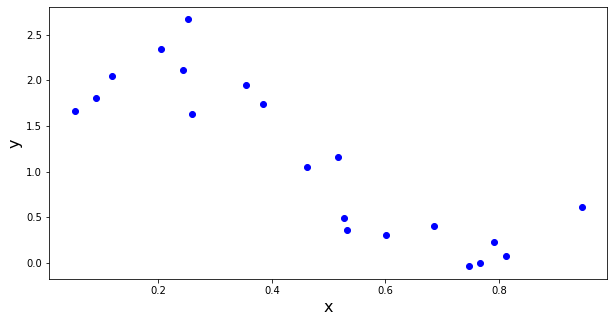

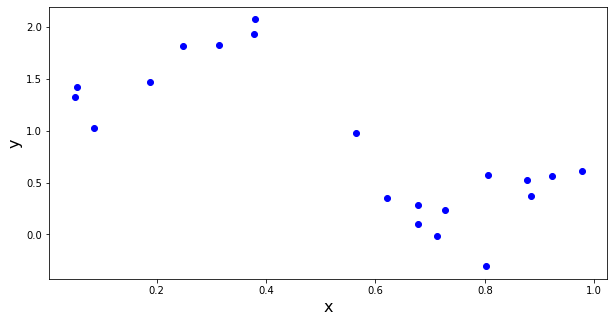

Investigating linear regression...
number of iterations: 10000
LR: 10^-6   Model Weights: [0.36400847 0.09215787]   Objective Function: 25.86329625891011
number of iterations: 10000
LR: 10^-5   Model Weights: [ 1.15699657 -0.22522908]   Objective Function: 13.158898555756045
number of iterations: 7020
LR: 10^-3   Model Weights: [ 2.4464068 -2.816353 ]   Objective Function: 3.9125764057919463


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:123: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:119: RuntimeWarning: overflow encountered in power
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:114: RuntimeWarning: invalid value encountered in subtract


number of iterations: 10000
LR:  0.05   Model Weights: [nan nan]   Objective Function: nan
Fit:       Model Weights: [ 2.44640709 -2.81635359]   Objective Function: 3.9125764057914636
number of iterations: 1731
LR:  None   Model Weights: [ 2.44640672 -2.81635284]   Objective Function: 3.912576405792244
Investigating polynomial regression...
number of iterations: 10000
LR: 10^-6   Model Weights: [0.36167314 0.09040644 0.02905198 0.01142641]   Objective Function: 25.92423963685676
RMS ERROR: 1.1385130573879414






































[[1.00000000e+00 5.15773000e-01 2.66021788e-01 1.37206855e-01
  7.07675914e-02 3.65000129e-02 1.88257212e-02 9.70979869e-03
  5.00805200e-03 2.58301800e-03]
 [1.00000000e+00 7.90645000e-01 6.25119516e-01 4.94247620e-01
  3.90774409e-01 3.08963833e-01 2.44280710e-01 1.93139322e-01
  1.52704639e-01 1.20735159e-01]
 [1.00000000e+00 6.85289000e-01 4.69621014e-01 3.21826115e-01
  2.20543896e-01 1.51136306e-01 1.03572048e-01 7.09767853e-02
  4.863961

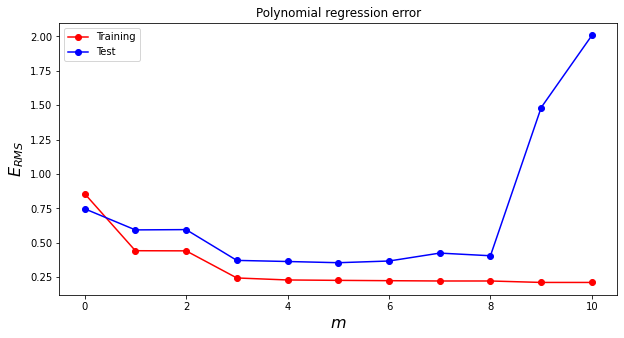

[0.8570606234439588, 0.44229946901344247, 0.44131496568291906, 0.2442692189841879, 0.22968276125805662, 0.2268113305178319, 0.22445294828005305, 0.22228193952070432, 0.22226057496594365, 0.21177883383060528, 0.2116891661250999]
5
[0.747268364185172, 0.5935949636028293, 0.5957110445316883, 0.3719429761720559, 0.36393172002169155, 0.35513774289024114, 0.3674501692231871, 0.42500830764136394, 0.4056688216464815, 1.482905455168123, 2.0075768981576716]
Done!


In [55]:
######################################################################
# main
######################################################################

def main():
    # load data
    train_data = load_data(train_path)
    test_data = load_data(test_path)
    
    
    ### ========== TODO : START ========== ###
    # part a: main code for visualizations
    print('Visualizing data...')
    train_X = train_data.X
    train_y = train_data.y
    test_X = test_data.X
    test_y = test_data.y
    plot_data(train_X, train_y)
    plot_data(test_X, test_y)
    
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts b-f: main code for linear regression

    # part b:
    print('Investigating linear regression...')
    model = PolynomialRegression()
    model.generate_polynomial_features(train_X)

    

    # part d:
    model.coef_ = np.zeros(2)
    model.fit_GD(train_X, train_y, 10 ** -6)
    print(f"LR: 10^-6   Model Weights: {model.coef_}   Objective Function: {(model.cost(train_X, train_y))}")
    model.coef_ = np.zeros(2)
    model.fit_GD(train_X, train_y, 10 ** -5)
    print(f"LR: 10^-5   Model Weights: {model.coef_}   Objective Function: {(model.cost(train_X, train_y))}")
    model.coef_ = np.zeros(2)
    model.fit_GD(train_X, train_y, 10 ** -3)
    print(f"LR: 10^-3   Model Weights: {model.coef_}   Objective Function: {(model.cost(train_X, train_y))}")
    model.coef_ = np.zeros(2)
    model.fit_GD(train_X, train_y, 0.05)
    print(f"LR:  0.05   Model Weights: {model.coef_}   Objective Function: {(model.cost(train_X, train_y))}")


    

    # part e:
    model.coef_ = np.zeros(2)
    model.fit(train_X, train_y)
    print(f"Fit:       Model Weights: {model.coef_}   Objective Function: {(model.cost(train_X, train_y))}")

    
    # part f:
    model.coef_ = np.zeros(2)
    model.fit_GD(train_X, train_y)
    print(f"LR:  None   Model Weights: {model.coef_}   Objective Function: {(model.cost(train_X, train_y))}")


    

        
    ### ========== TODO : END ========== ###
    
    
    
    ### ========== TODO : START ========== ###
    # parts g-i: main code for polynomial regression
    print('Investigating polynomial regression...')

    # part g:
    model = PolynomialRegression(m=3)
    model.generate_polynomial_features(train_X)
    

    
    # part h:
    model.coef_ = np.zeros(2)
    model.fit_GD(train_X, train_y, 10 ** -6)
    print(f"LR: 10^-6   Model Weights: {model.coef_}   Objective Function: {(model.cost(train_X, train_y))}")
    print(f"RMS ERROR: {model.rms_error(train_X, train_y)}")
    
    # part i:
    m = []
    train_rms_error = []
    test_rms_error = []
    for i in range(0, 11):
      print("\n")
      model = PolynomialRegression(m=i)
      model.fit(train_X, train_y)
      m.append(i)
      #print(f"Fit: m={i}       Model Weights: {model.coef_}   Objective Function: {(model.cost(train_X, train_y))}")
      #print(f"TRAIN RMS ERROR: {model.rms_error(train_X, train_y)}")
      train_rms_error.append(model.rms_error(train_X, train_y))
      #print(f"TEST RMS ERROR: {model.rms_error(test_X, test_y)}")
      test_rms_error.append(model.rms_error(test_X, test_y))
      print("\n")
      del model

    

    plot_erms(m, train_rms_error, test_rms_error)
    
    print(train_rms_error)
    print(test_rms_error.index(min(test_rms_error)))
    print(test_rms_error)

    #print(train_rms_error)

    

    
        
    ### ========== TODO : END ========== ###
    
    
    print("Done!")

if __name__ == "__main__":
    main()
